In [ ]:
#Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.tsa.arima.model as stats
from statsmodels.tsa.arima_model import ARIMA

from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

In [ ]:
#Data Importation
pl11 = pd.read_csv('/content/PL11_data_all_En.csv')
pl11.head()

,Cycles,Capacity,PerEn3
0,6,1.4393,1.8572
1,11,1.4360,1.8107
2,16,1.4335,1.7562
3,21,1.4314,1.7692
4,26,1.4282,1.8305


In [ ]:
df = pd.DataFrame({'Capacity':None,'PerEn':None,'Cycles':np.arange(1,703)})
for i in range(132):
  df['Capacity'][pl11.iloc[i][0]] = pl11['Capacity'][i]
  df['PerEn'][pl11.iloc[i][0]] = pl11['PerEn3'][i]
df['Capacity'][701] = pl11['Capacity'][132]
df['PerEn'][701] = pl11['PerEn3'][132]

for i in range(132):
  if (df['Capacity'][i]!=None):
      df['Capacity'][0] = df['Capacity'][i]
      df['PerEn'][0] = df['PerEn'][i]
      break

for i in range(702):
  if (df['Capacity'][i]==None):
    j = i+1
    while j<=702:
      if (df['Capacity'][j]!=None):
        break
      j+=1
    df['Capacity'][i] = np.mean([df['Capacity'][i-1],df['Capacity'][j]])
    df['PerEn'][i] = np.mean([df['PerEn'][i-1],df['PerEn'][j]])
df['PerEn'] = pd.to_numeric(df['PerEn'])
df['Capacity'] = pd.to_numeric(df['Capacity'])

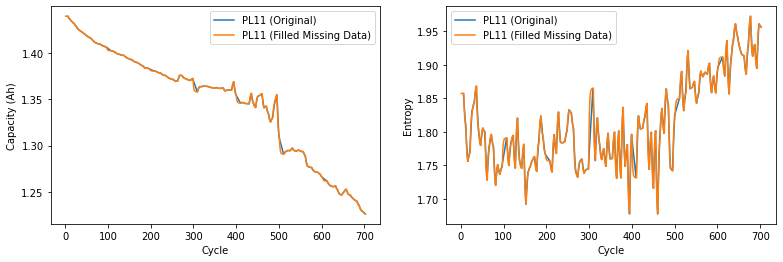

In [ ]:
fig, ax = plt.subplots(1,2, figsize= (13,4))
ax[0].plot(pl11['Cycles'], pl11['Capacity'],label='PL11 (Original)')
ax[0].plot(df['Cycles'], df['Capacity'],label='PL11 (Filled Missing Data)')
ax[0].set_xlabel('Cycle')
ax[0].set_ylabel('Capacity (Ah)')
ax[0].legend()
ax[1].plot(pl11['Cycles'], pl11['PerEn3'],label='PL11 (Original)')
ax[1].plot(df['Cycles'], df['PerEn'],label='PL11 (Filled Missing Data)')
ax[1].set_xlabel('Cycle')
ax[1].set_ylabel('Entropy')
ax[1].legend()

#Arima

In [ ]:
x = df['PerEn']
y = df['Capacity']
y = np.array([y]).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42, shuffle=False)

data = df['Capacity'].values
train, test = data[0:len(X_train)], data[len(X_train):len(x)]
data = [x for x in train]

In [ ]:
y_pred_ARIMA = list()
for t in range(len(test)):
	model = stats.ARIMA(data, order=(5,1,0))
	model_fit = model.fit()
	out = model_fit.forecast()
	pred = out[0]
	y_pred_ARIMA.append(pred)
	obs = test[t]
	data.append(obs)
	print('predicted=%f, expected=%f' % (pred, obs))

predicted=1.269108, expected=1.269100
predicted=1.268975, expected=1.267450


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.266594, expected=1.266625
predicted=1.266202, expected=1.266212
predicted=1.265998, expected=1.266006
predicted=1.265810, expected=1.265800


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.265581, expected=1.263800


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.262743, expected=1.262800
predicted=1.262277, expected=1.262300
predicted=1.262034, expected=1.262050
predicted=1.261809, expected=1.261925


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.261718, expected=1.261862
predicted=1.261759, expected=1.261831


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.261780, expected=1.261816
predicted=1.261790, expected=1.261808
predicted=1.261795, expected=1.261804
predicted=1.261797, expected=1.261800
predicted=1.261796, expected=1.259900
predicted=1.258951, expected=1.258950
predicted=1.258481, expected=1.258475
predicted=1.258241, expected=1.258237
predicted=1.258018, expected=1.258000
predicted=1.257745, expected=1.257150


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.256657, expected=1.256725
predicted=1.256481, expected=1.256512
predicted=1.256384, expected=1.256406
predicted=1.256297, expected=1.256300


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.256185, expected=1.255900


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.255670, expected=1.255700
predicted=1.255586, expected=1.255600
predicted=1.255540, expected=1.255550


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.255499, expected=1.255500


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.255446, expected=1.256050
predicted=1.256310, expected=1.256325
predicted=1.256453, expected=1.256463
predicted=1.256525, expected=1.256531
predicted=1.256592, expected=1.256600
predicted=1.256674, expected=1.254300
predicted=1.253173, expected=1.253150
predicted=1.252593, expected=1.252575
predicted=1.252299, expected=1.252287
predicted=1.252025, expected=1.252000
predicted=1.251691, expected=1.249700
predicted=1.248467, expected=1.248550
predicted=1.247941, expected=1.247975


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.247663, expected=1.247688
predicted=1.247408, expected=1.247400
predicted=1.247085, expected=1.247100


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.246865, expected=1.246950


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.246833, expected=1.246875


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.246809, expected=1.246837


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.246789, expected=1.246800
predicted=1.246759, expected=1.248500
predicted=1.249336, expected=1.249350
predicted=1.249763, expected=1.249775
predicted=1.249980, expected=1.249988
predicted=1.250182, expected=1.250200
predicted=1.250432, expected=1.251550
predicted=1.252287, expected=1.252225
predicted=1.252589, expected=1.252562
predicted=1.252750, expected=1.252731
predicted=1.252897, expected=1.252900
predicted=1.253086, expected=1.250250
predicted=1.248978, expected=1.248925
predicted=1.248297, expected=1.248263
predicted=1.247954, expected=1.247931
predicted=1.247633, expected=1.247600
predicted=1.247241, expected=1.246950
predicted=1.246529, expected=1.246625
predicted=1.246416, expected=1.246462
predicted=1.246349, expected=1.246381
predicted=1.246291, expected=1.246300


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.246212, expected=1.244850
predicted=1.244103, expected=1.244125
predicted=1.243756, expected=1.243762
predicted=1.243576, expected=1.243581
predicted=1.243410, expected=1.243400
predicted=1.243202, expected=1.242400
predicted=1.241848, expected=1.241900
predicted=1.241627, expected=1.241650
predicted=1.241509, expected=1.241525
predicted=1.241401, expected=1.241400
predicted=1.241263, expected=1.240650


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.240239, expected=1.240275
predicted=1.240072, expected=1.240088
predicted=1.239983, expected=1.239994
predicted=1.239901, expected=1.239900
predicted=1.239797, expected=1.237700


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.236575, expected=1.236600
predicted=1.236044, expected=1.236050
predicted=1.235770, expected=1.235775


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.235516, expected=1.235500
predicted=1.235196, expected=1.232900


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.231517, expected=1.231600


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.230917, expected=1.230950
predicted=1.230602, expected=1.230625
predicted=1.230310, expected=1.230300


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.229932, expected=1.229350


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.228773, expected=1.228875


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.228589, expected=1.228638
predicted=1.228486, expected=1.228519
predicted=1.228392, expected=1.228400
predicted=1.228265, expected=1.227350
predicted=1.226789, expected=1.226825


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.226548, expected=1.226562
predicted=1.226421, expected=1.226300


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


#LSTM

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(1, return_sequences=False, input_shape= (len(X_train), 1)))
#model.add(LSTM(1, return_sequences=False))
#model.add(tf.keras.layers.Dense(units=3,activation='relu'))
#model.add(tf.keras.layers.Dropout(0.1))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mean_squared_error'])

# Train the model
history = model.fit(X_train, y_train, batch_size=16, epochs=2000, validation_data=(X_test, y_test))

Epoch 1/2000
38/38 [==============================] - 3s 23ms/step - loss: 2.6076 - mean_squared_error: 2.6076 - val_loss: 2.1719 - val_mean_squared_error: 2.1719
Epoch 2/2000
38/38 [==============================] - 0s 6ms/step - loss: 2.3732 - mean_squared_error: 2.3732 - val_loss: 1.9612 - val_mean_squared_error: 1.9612
Epoch 3/2000
38/38 [==============================] - 0s 7ms/step - loss: 2.1595 - mean_squared_error: 2.1595 - val_loss: 1.7702 - val_mean_squared_error: 1.7702
Epoch 4/2000
38/38 [==============================] - 0s 6ms/step - loss: 1.9656 - mean_squared_error: 1.9656 - val_loss: 1.5977 - val_mean_squared_error: 1.5977
Epoch 5/2000
38/38 [==============================] - 0s 6ms/step - loss: 1.7901 - mean_squared_error: 1.7901 - val_loss: 1.4421 - val_mean_squared_error: 1.4421
Epoch 6/2000
38/38 [==============================] - 0s 6ms/step - loss: 1.6314 - mean_squared_error: 1.6314 - val_loss: 1.3019 - val_mean_squared_error: 1.3019
Epoch 7/2000
38/38 [=======

In [ ]:
y_pred_LSTM = model.predict(X_test+0.1)
np.concatenate((y_pred_LSTM.reshape(len(X_test),1),y_test.reshape(len(X_test),1)),1)

array([[1.2835263 , 1.2691    ],
       [1.27341843, 1.26745   ],
       [1.26833344, 1.266625  ],
       [1.26578331, 1.2662125 ],
       [1.26450646, 1.26600625],
       [1.26322842, 1.2658    ],
       [1.25918913, 1.2638    ],
       [1.25716496, 1.2628    ],
       [1.25615168, 1.2623    ],
       [1.2556448 , 1.26205   ],
       [1.25539136, 1.261925  ],
       [1.25526464, 1.2618625 ],
       [1.25520122, 1.26183125],
       [1.25516939, 1.26181563],
       [1.25515366, 1.26180781],
       [1.25514567, 1.26180391],
       [1.2551378 , 1.2618    ],
       [1.26269412, 1.2599    ],
       [1.26645637, 1.25895   ],
       [1.26833344, 1.258475  ],
       [1.26927102, 1.2582375 ],
       [1.27020788, 1.258     ],
       [1.25613153, 1.25715   ],
       [1.24903858, 1.256725  ],
       [1.24547887, 1.2565125 ],
       [1.24369597, 1.25640625],
       [1.2419107 , 1.2563    ],
       [1.26325512, 1.2559    ],
       [1.27380252, 1.2557    ],
       [1.27904356, 1.2556    ],
       [1.

#Evaluation

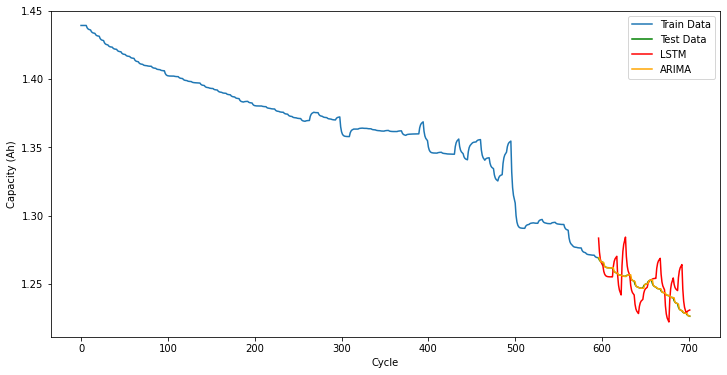

In [ ]:
pred_LSTM = pd.DataFrame(y_pred_LSTM,index = df[len(X_train):].index,columns=['Prediction'])
pred_ARIMA = pd.DataFrame(y_pred_ARIMA,index = df[len(X_train):].index,columns=['Prediction'])

plt.figure(figsize=(12,6))
plt.plot(df[:len(X_train)]['Capacity'],label='Train Data')
plt.plot(df[len(X_train):]['Capacity'],color='green',label='Test Data')
plt.plot(pred_LSTM,color='red', label='LSTM')
plt.plot(pred_ARIMA, color='orange', label='ARIMA')

plt.xlabel('Cycle')
plt.ylabel('Capacity (Ah)')
plt.legend()
plt.show()

In [ ]:
print('LSTM')
print(' ')
print('MAE : ' , metrics.mean_absolute_error(y_test,y_pred_LSTM))
print('MSE : ' , metrics.mean_squared_error(y_test,y_pred_LSTM))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(y_test,y_pred_LSTM)))

LSTM
 
MAE :  0.009782862467136022
MSE :  0.00015402293216465061
RMSE :  0.012410597574841052


In [ ]:
print('ARIMA')
print(' ')
print('MAE : ' , metrics.mean_absolute_error(test,y_pred_ARIMA))
print('MSE : ' , metrics.mean_squared_error(test,y_pred_ARIMA))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(test,y_pred_ARIMA)))

ARIMA
 
MAE :  0.0002658184653835613
MSE :  4.317185823710474e-07
RMSE :  0.0006570529524863634
